# 1) Načítanie, manipulácia dát
- naciatanie dat z csv do pandas dataframu

In [1]:
import pandas as pd

# vytvorenie dataframe a nacitanie dat z .csv
df = pd.read_csv(
    "./data-nbs/real-estate-price-by-region.csv",
    sep=";",
    encoding="utf-8-sig",  # odstraňuje BOM
    skiprows=2,  # preskočí prvé 2 riadky
    quotechar='"',  # umožní spracovať hodnoty v úvodzovkách
)

# Zobrazíme dataframe prvych par riadkov
df.head()

,"Rok, Štvrťrok",SR spolu,BA,TT,NR,TN,ZA,BB,KE,PO
0,1Q 2025,"2 699,9528","3 486,0807","1 920,0923","1 389,3421","1 658,7542","1 929,9326","1 604,6563","2 348,8622","1 985,3942"
1,2024,"2 500,2402","3 189,8626","1 842,6759","1 388,7540","1 581,0672","1 871,5093","1 538,2085","2 101,9162","1 859,8821"
2,4Q 2024,"2 596,0585","3 316,4295","1 879,2891","1 403,5499","1 626,3293","1 948,7875","1 604,2922","2 222,0876","1 955,6184"
3,3Q 2024,"2 520,3183","3 228,6928","1 859,3694","1 354,1713","1 579,4533","1 891,1678","1 511,3679","2 087,1201","1 898,8263"
4,2Q 2024,"2 461,5872","3 126,9928","1 836,8291","1 392,7826","1 569,0660","1 819,2101","1 562,3881","2 087,0147","1 817,9340"


In [3]:
# nacitanie prvych 5 riadkov
# pre kontrolu a spresnenie df prikazu na nacitanie
print(open("./data-nbs/real-estate-price-by-region.csv").readlines()[:5])

['ď»ż"Ceny nehnuteÄľnostĂ\xad na bĂ˝vanie podÄľa krajov v â‚¬/m2"\n', '\n', '"Rok, Ĺ\xa0tvrĹĄrok";"SR spolu";BA;TT;NR;TN;ZA;BB;KE;PO\n', '"1Q 2025";"2 699,9528";"3 486,0807";"1 920,0923";"1 389,3421";"1 658,7542";"1 929,9326";"1 604,6563";"2 348,8622";"1 985,3942"\n', '2024;"2 500,2402";"3 189,8626";"1 842,6759";"1 388,7540";"1 581,0672";"1 871,5093";"1 538,2085";"2 101,9162";"1 859,8821"\n']


## 1.1) Zakladne preskumanie dat

- info o tabulke

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rok, Štvrťrok  104 non-null    object
 1   SR spolu       104 non-null    object
 2   BA             104 non-null    object
 3   TT             104 non-null    object
 4   NR             104 non-null    object
 5   TN             104 non-null    object
 6   ZA             104 non-null    object
 7   BB             104 non-null    object
 8   KE             104 non-null    object
 9   PO             104 non-null    object
dtypes: object(10)
memory usage: 8.3+ KB


- prvych par riadkov

In [ ]:
df.head()

,"Rok, Štvrťrok",SR spolu,BA,TT,NR,TN,ZA,BB,KE,PO
0,1Q 2025,"2 699,9528","3 486,0807","1 920,0923","1 389,3421","1 658,7542","1 929,9326","1 604,6563","2 348,8622","1 985,3942"
1,2024,"2 500,2402","3 189,8626","1 842,6759","1 388,7540","1 581,0672","1 871,5093","1 538,2085","2 101,9162","1 859,8821"
2,4Q 2024,"2 596,0585","3 316,4295","1 879,2891","1 403,5499","1 626,3293","1 948,7875","1 604,2922","2 222,0876","1 955,6184"
3,3Q 2024,"2 520,3183","3 228,6928","1 859,3694","1 354,1713","1 579,4533","1 891,1678","1 511,3679","2 087,1201","1 898,8263"
4,2Q 2024,"2 461,5872","3 126,9928","1 836,8291","1 392,7826","1 569,0660","1 819,2101","1 562,3881","2 087,0147","1 817,9340"


- popisne statistiky

In [ ]:
df.describe().T

,count,unique,top,freq
"Rok, Štvrťrok",104,104,1Q 2025,1
SR spolu,104,104,"2 699,9528",1
BA,104,104,"3 486,0807",1
TT,104,104,"1 920,0923",1
NR,104,104,"1 389,3421",1
TN,104,104,"1 658,7542",1
ZA,104,104,"1 929,9326",1
BB,104,104,"1 604,6563",1
KE,104,104,"2 348,8622",1
PO,104,104,"1 985,3942",1


- premenovanie stlpca "rok, stvrtrok" na "datum"

In [ ]:
df = df.rename(columns={"Rok, Štvrťrok": "Datum", "SR spolu": "Spolu"})
df.head()

,Datum,Spolu,BA,TT,NR,TN,ZA,BB,KE,PO
0,1Q 2025,"2 699,9528","3 486,0807","1 920,0923","1 389,3421","1 658,7542","1 929,9326","1 604,6563","2 348,8622","1 985,3942"
1,2024,"2 500,2402","3 189,8626","1 842,6759","1 388,7540","1 581,0672","1 871,5093","1 538,2085","2 101,9162","1 859,8821"
2,4Q 2024,"2 596,0585","3 316,4295","1 879,2891","1 403,5499","1 626,3293","1 948,7875","1 604,2922","2 222,0876","1 955,6184"
3,3Q 2024,"2 520,3183","3 228,6928","1 859,3694","1 354,1713","1 579,4533","1 891,1678","1 511,3679","2 087,1201","1 898,8263"
4,2Q 2024,"2 461,5872","3 126,9928","1 836,8291","1 392,7826","1 569,0660","1 819,2101","1 562,3881","2 087,0147","1 817,9340"


- unikatne hodnoty v kategoriach

In [ ]:
df["BA"].value_counts()

BA
3 486,0807    1
3 189,8626    1
3 316,4295    1
3 228,6928    1
3 126,9928    1
             ..
1 107,4916    1
1 118,8673    1
1 284,7374    1
1 180,1766    1
778,6298      1
Name: count, Length: 104, dtype: int64

In [ ]:
df["NR"].unique()

array(['1 389,3421', '1 388,7540', '1 403,5499', '1 354,1713',
       '1 392,7826', '1 404,5123', '1 400,1744', '1 358,1230',
       '1 375,4205', '1 431,8756', '1 435,2784', '1 401,3927',
       '1 445,9747', '1 449,9987', '1 409,2889', '1 300,3086',
       '1 172,1177', '1 247,0621', '1 197,5270', '1 136,8223',
       '1 107,0595', '950,9804', '971,0796', '987,8749', '945,0089',
       '899,9584', '877,3151', '881,2773', '888,4145', '857,0547',
       '882,5140', '748,3660', '810,3856', '767,1912', '724,6478',
       '691,2393', '662,5060', '657,7928', '680,5385', '667,7175',
       '643,9754', '586,9795', '617,2723', '598,9868', '580,6159',
       '551,0428', '556,0568', '532,7409', '555,5704', '564,1636',
       '571,7522', '579,5977', '573,6759', '581,5039', '579,0087',
       '584,2023', '584,9446', '578,4061', '586,1370', '587,3680',
       '587,8670', '612,0164', '599,5848', '602,0208', '626,4984',
       '619,9616', '623,9235', '634,3595', '640,9011', '618,4207',
       '602,0

- kontrola duplikatov

In [ ]:
df.duplicated().sum()

np.int64(0)

## 1.3) Cistenie dat

- chybajuce hodnoty

In [ ]:
df.isna().sum()

Datum    0
Spolu    0
BA       0
TT       0
NR       0
TN       0
ZA       0
BB       0
KE       0
PO       0
dtype: int64

- odstrani medzery v nazvoch stlpcov (ak su)

In [ ]:
df.columns = df.columns.str.strip()

## 1.4) Vizualizacia trendu cien podla regionu

- udaje pre 4Q

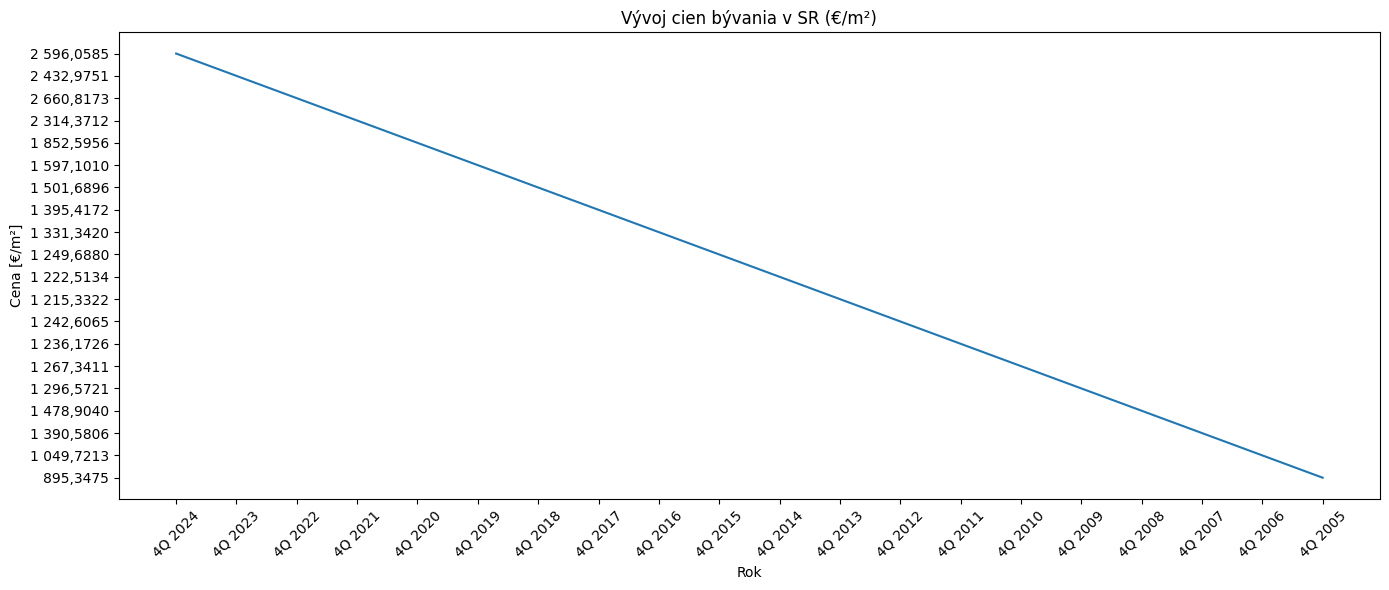

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# zobrazit udaje len pre Q4
# filtracia dat
df_q4 = df[df["Datum"].str.contains("4Q")]


plt.figure(figsize=(14, 6))
sns.lineplot(data=df_q4, x="Datum", y="Spolu")
plt.xticks(rotation=45)
plt.title("Vývoj cien bývania v SR (€/m²)")
plt.ylabel("Cena [€/m²]")
plt.xlabel("Rok")
plt.tight_layout()
plt.show()

- vytvorenie noveho dataframe so stlpcom "Rok"

In [ ]:
df["Rok"] = df["Datum"].str.extract(r"^(\d{4})$")
# str.extract(r"^(\d{4})$")
# Extrahuje presne 4-ciferne roky zo stlpca Datum, vsetko ostatne ignoruje (napr. "1Q 2023").
#  Regex r"^(\d{4})$" - vysvetlenie
# ^ - zaciatok retazca
# \d{4} - presne 4 cislice
# $ - koniec retazca
df_years = df[df["Rok"].isna() == False]
df_years.head()

,Datum,Spolu,BA,TT,NR,TN,ZA,BB,KE,PO,Rok
1,2024,"2 500,2402","3 189,8626","1 842,6759","1 388,7540","1 581,0672","1 871,5093","1 538,2085","2 101,9162","1 859,8821",2024
6,2023,"2 480,2110","3 130,5896","1 832,1117","1 400,1744","1 582,4151","1 933,6217","1 658,7553","2 102,0006","1 870,8310",2023
11,2022,"2 638,9266","3 356,6988","1 842,0271","1 401,3927","1 628,5515","2 021,2716","1 757,3663","2 335,3842","2 062,3416",2022
16,2021,"2 175,8300","2 825,6871","1 459,6515","1 172,1177","1 297,1406","1 657,3770","1 379,3437","1 798,2391","1 574,1419",2021
21,2020,"1 761,7530","2 333,4363","1 195,5591","950,9804","1 054,1616","1 312,4622","989,1686","1 325,1475","1 147,9209",2020


In [ ]:
# zistim typ udajov v stlpci Rok
df_years["Rok"].apply(type)

1      <class 'str'>
6      <class 'str'>
11     <class 'str'>
16     <class 'str'>
21     <class 'str'>
26     <class 'str'>
31     <class 'str'>
36     <class 'str'>
41     <class 'str'>
46     <class 'str'>
51     <class 'str'>
56     <class 'str'>
61     <class 'str'>
66     <class 'str'>
71     <class 'str'>
76     <class 'str'>
81     <class 'str'>
86     <class 'str'>
91     <class 'str'>
96     <class 'str'>
101    <class 'str'>
102    <class 'str'>
103    <class 'str'>
Name: Rok, dtype: object

In [ ]:
# zmena typu udajov v stlpci "Rok" str na int
df_years["Rok"] = df_years["Rok"].astype(int)
# vypise prvu hodnotu pre kontrolu typu
df_years["Rok"].iloc[0]

C:\Users\vimi\AppData\Local\Temp\ipykernel_14992\3897100492.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_years["Rok"] = df_years["Rok"].astype(int)


np.int64(2024)

- filtrovanie konkretneho obdobia (napr. 2010 – 2024)

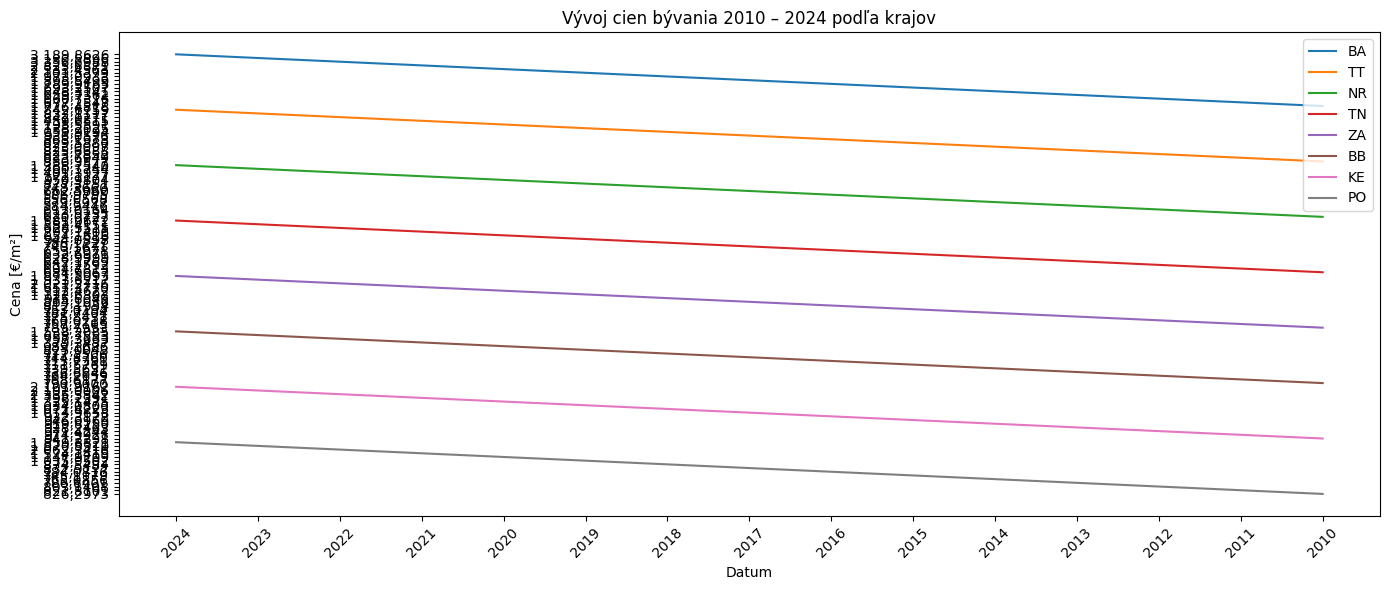

In [ ]:
# filtrovanie rokov 2010 az 2024
df_2010_2024 = df_years[(df_years["Rok"] >= 2010) & (df_years["Rok"] <= 2024)]

plt.figure(figsize=(14, 6))
for col in df.columns[2:10]:  # len kraje
    sns.lineplot(data=df_2010_2024, x="Datum", y=col, label=col)

plt.xticks(rotation=45)
plt.title("Vývoj cien bývania 2010 – 2024 podľa krajov")
plt.ylabel("Cena [€/m²]")
plt.tight_layout()
plt.legend()
plt.show()


# 2) Analýzy - úlohy na riešenie

## 1. Ktorý región má v poslednom období najvyššie ceny a ako sa vyvíjali za posledné 3 roky?

- Cieľ: Identifikovať región s najvyššou priemernou cenou nehnuteľností v poslednom dostupnom roku a zobraziť vývoj cien v tomto regióne za posledné 3 roky. 

In [ ]:
# zistim aky typ su udaje cien
df_years["Spolu"].iloc[0]

'2 500,2402'

In [ ]:
# konverzia str na cisla s desatinou ciarkou (float)
cols = df_years.columns.drop(["Datum", "Rok"])
for col in cols:
    # Odstráni medzery a nahradí čiarky bodkami, potom prevedie na float
    df_years[col] = (
        df_years[col]
        .astype(str)
        .str.replace(" ", "")
        .str.replace(",", ".")
        .astype(float)
    )

# filtrovanie poslednych 3 rokov
recent_years = df_years[df_years["Rok"] >= df_years["Rok"].max() - 2]

# ceny za posledne 3 roky
latest_prices = recent_years.groupby("Rok").mean(numeric_only=True)
display(latest_prices)

# ktory kraj ma najvyssia cena v najnovsom roku
# 1. Najnovší rok v dátach
latest_year = df_years["Rok"].max()
# 2. Dáta pre najnovší rok
latest_data = recent_years[recent_years["Rok"] == latest_year].squeeze()
# 3. Vyberieme len kraje
region_values = latest_data[cols]
# 4. Zistíme región s najvyššou cenou
top_region = region_values.idxmax()
top_price = region_values.max()

print(
    f"📌 V roku {latest_year} mal najvyššiu cenu región: {top_region} ({top_price:.2f} €/m²)"
)

C:\Users\vimi\AppData\Local\Temp\ipykernel_14992\2260118060.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_years[col] = (
C:\Users\vimi\AppData\Local\Temp\ipykernel_14992\2260118060.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_years[col] = (
C:\Users\vimi\AppData\Local\Temp\ipykernel_14992\2260118060.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,Spolu,BA,TT,NR,TN,ZA,BB,KE,PO
Rok,,,,,,,,,
2022,2638.9266,3356.6988,1842.0271,1401.3927,1628.5515,2021.2716,1757.3663,2335.3842,2062.3416
2023,2480.2110,3130.5896,1832.1117,1400.1744,1582.4151,1933.6217,1658.7553,2102.0006,1870.8310
2024,2500.2402,3189.8626,1842.6759,1388.7540,1581.0672,1871.5093,1538.2085,2101.9162,1859.8821


📌 V roku 2024 mal najvyššiu cenu región: BA (3189.86 €/m²)


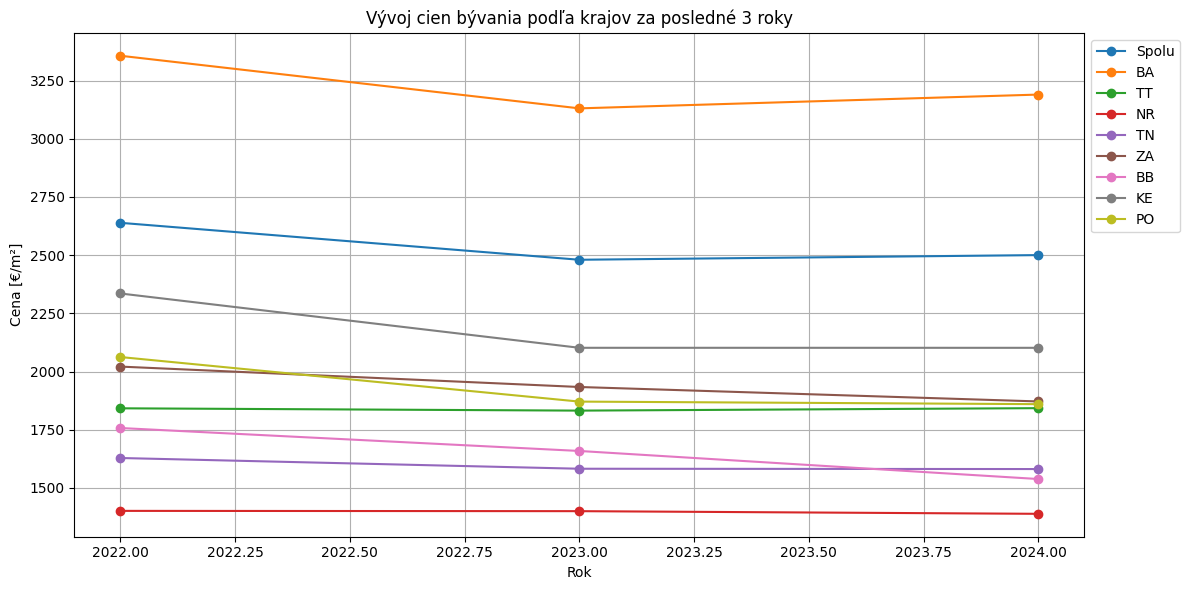

In [ ]:
# Vizualizácia vývoja cien za posledné 3 roky
recent_years.set_index("Rok")[cols].plot(marker="o", figsize=(12, 6))
plt.title("Vývoj cien bývania podľa krajov za posledné 3 roky")
plt.ylabel("Cena [€/m²]")
plt.xlabel("Rok")
plt.grid(True)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


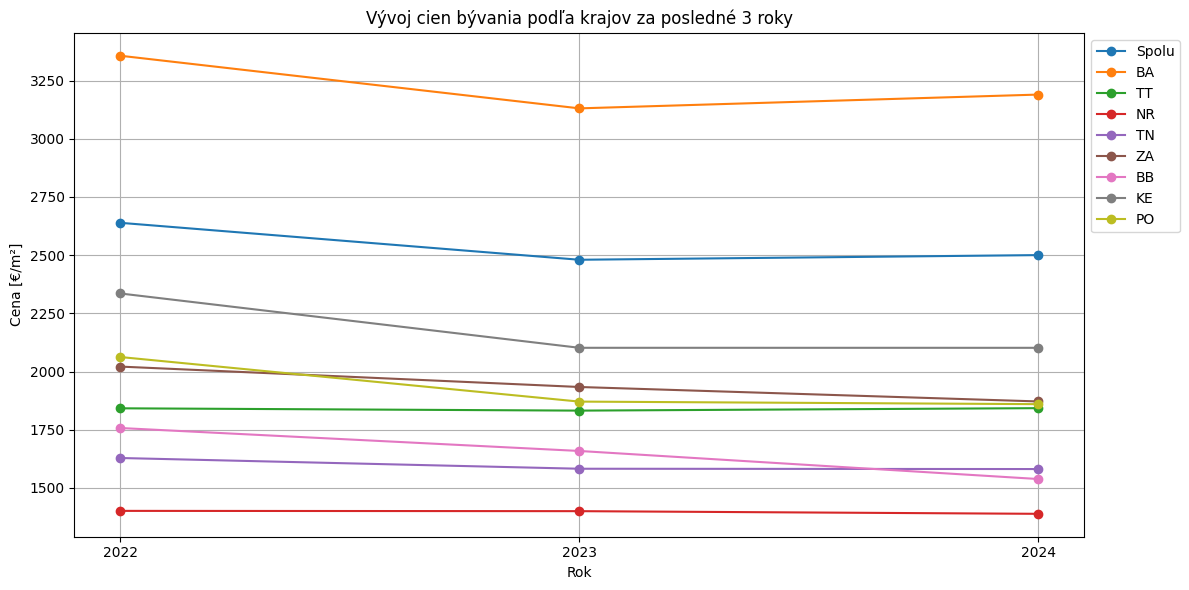

In [ ]:
# Opravený graf s osou x len pre celé roky
import matplotlib.ticker as ticker

# 1. Vykreslenie grafu
ax = recent_years.set_index("Rok")[cols].plot(marker="o", figsize=(12, 6))

# 2. Nastavenie osy X: len celé roky
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# 3. Štýl a popisy
plt.title("Vývoj cien bývania podľa krajov za posledné 3 roky")
plt.ylabel("Cena [€/m²]")
plt.xlabel("Rok")
plt.grid(True)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

## 2. Ktorý kraj mal najvyšší nárast cien medzi 2022 a 2024?

- Cieľ: Porovnať hodnoty v stĺpcoch jednotlivých krajov medzi rokmi 2022 a 2024 a zistiť, kde bol najväčší rozdiel.

,Datum,Spolu,BA,TT,NR,TN,ZA,BB,KE,PO
Rok,,,,,,,,,,
2024,2024,2500.2402,3189.8626,1842.6759,1388.7540,1581.0672,1871.5093,1538.2085,2101.9162,1859.8821
2022,2022,2638.9266,3356.6988,1842.0271,1401.3927,1628.5515,2021.2716,1757.3663,2335.3842,2062.3416


BA   -166.8362
TT      0.6488
NR    -12.6387
TN    -47.4843
ZA   -149.7623
BB   -219.1578
KE    -233.468
PO   -202.4595
dtype: object
TT
0.6487999999999374


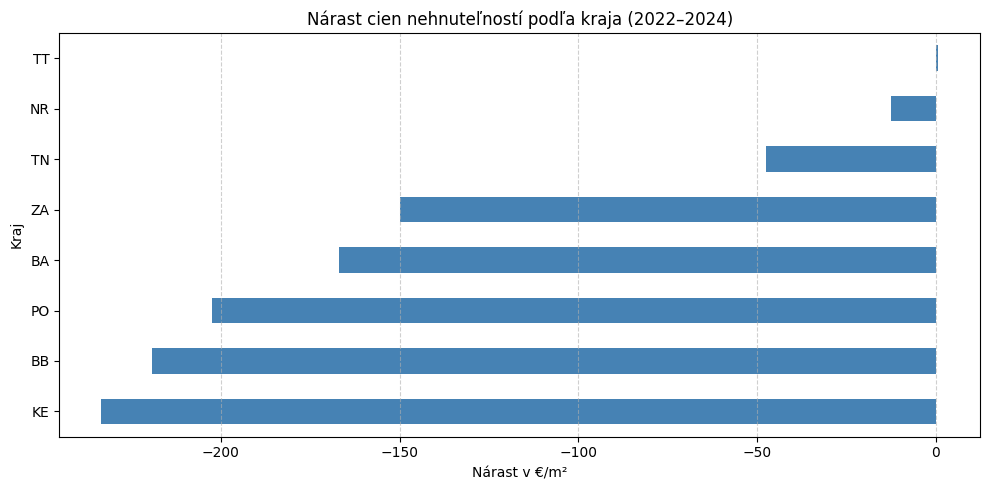

In [ ]:
# vyber rokov 2022 a 2024
df_compare = df_years[df_years["Rok"].isin([2022, 2024])].set_index("Rok")

display(df_compare)
# vyberiem len stĺpce s krajmi
region_cols = df_compare.columns.drop(["Datum", "Spolu"])

# vypočítam rozdiel medzi rokmi pre každý kraj
growth = df_compare.loc[2024, region_cols] - df_compare.loc[2022, region_cols]
print(growth)

# zistím kraj s najvyšším rastom
top_region = growth.idxmax()
top_growth = growth.max()
print(top_region)
print(top_growth)

# vizualizácia
plt.figure(figsize=(10, 5))
growth.sort_values().plot(kind="barh", color="steelblue")
plt.title("Nárast cien nehnuteľností podľa kraja (2022–2024)")
plt.xlabel("Nárast v €/m²")
plt.ylabel("Kraj")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

## 3. Ktorý kraj mal najstabilnejšie ceny za posledné 3 roky?

- Cieľ: Zistiť kraj, kde sa ceny najmenej menili, teda kraj s najnižšou štandardnou odchýlkou (std) v rokoch 2022 až 2024.

,Datum,Spolu,BA,TT,NR,TN,ZA,BB,KE,PO
Rok,,,,,,,,,,
2024,2024,2500.2402,3189.8626,1842.6759,1388.7540,1581.0672,1871.5093,1538.2085,2101.9162,1859.8821
2023,2023,2480.2110,3130.5896,1832.1117,1400.1744,1582.4151,1933.6217,1658.7553,2102.0006,1870.8310
2022,2022,2638.9266,3356.6988,1842.0271,1401.3927,1628.5515,2021.2716,1757.3663,2335.3842,2062.3416


Index(['BA', 'TT', 'NR', 'TN', 'ZA', 'BB', 'KE', 'PO'], dtype='object')
BA    117.241188
TT      5.920845
NR      6.971926
TN     27.034370
ZA     75.243163
BB    109.761713
KE    134.768455
PO    113.861054
dtype: float64
TT
5.920844819224173


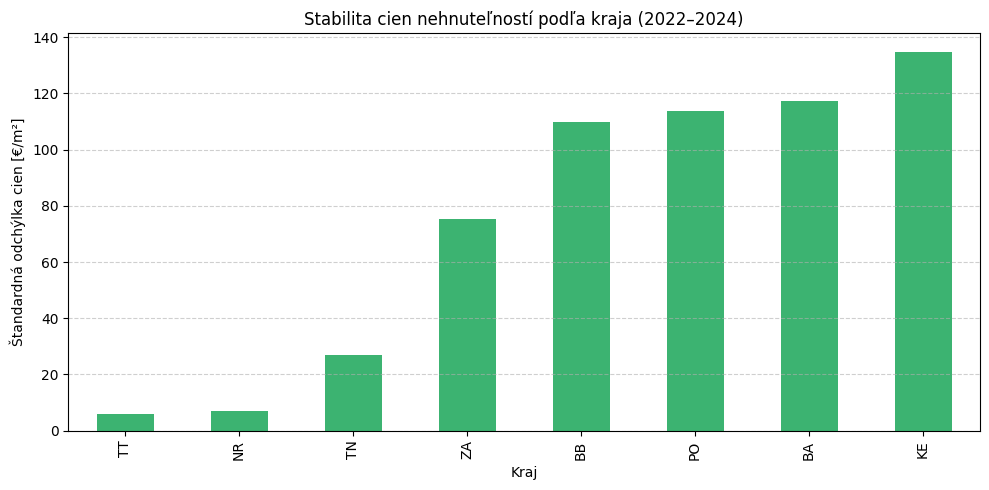

In [ ]:
# vyberiem len roky 2022 až 2024 (malo by už byť hotové v df_years)
df_3years = df_years[df_years["Rok"].isin([2022, 2023, 2024])].set_index("Rok")
display(df_3years)

# vyberiem stlpce krajov
region_cols = df_3years.columns.drop(["Datum", "Spolu"])
print(region_cols)

# vypočítam štandardnú odchýlku pre každý kraj
std_dev = df_3years[region_cols].std()
print(std_dev)

# zistím kraj s najmenšou odchýlkou (najstabilnejší)
stable_region = std_dev.idxmin()
print(stable_region)
stable_std = std_dev.min()
print(stable_std)

# vizualizácia
plt.figure(figsize=(10, 5))
std_dev.sort_values().plot(kind="bar", color="mediumseagreen")
plt.title("Stabilita cien nehnuteľností podľa kraja (2022–2024)")
plt.ylabel("Štandardná odchýlka cien [€/m²]")
plt.xlabel("Kraj")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

## 4. Ktorý kraj zaznamenal najväčší nárast cien za posledné 3 roky?

- Cieľ: Porovnať cenu v roku 2024 a 2022 a nájsť kraj s najväčším absolútnym alebo percentuálnym nárastom.

Index(['BA', 'TT', 'NR', 'TN', 'ZA', 'BB', 'KE', 'PO'], dtype='object')
BA   -166.8362
TT      0.6488
NR    -12.6387
TN    -47.4843
ZA   -149.7623
BB   -219.1578
KE    -233.468
PO   -202.4595
dtype: object
TT
0.6487999999999374
TT
0.03522206595114357


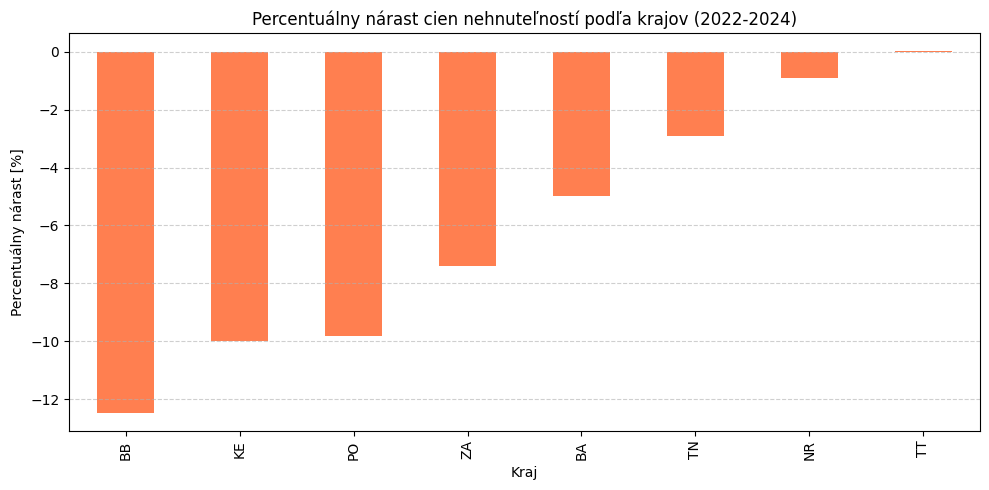

In [ ]:
# zoberiem dáta za roky 2022 a 2024
df_22 = df_years[df_years["Rok"] == 2022].set_index("Rok")
df_24 = df_years[df_years["Rok"] == 2024].set_index("Rok")

# vyberiem stlpce krajov
region_cols = df_22.columns.drop(["Datum", "Spolu"])
print(region_cols)

# spočítame absolútny a percentuálny nárast
abs_increase = df_24.loc[2024, region_cols] - df_22.loc[2022, region_cols]
print(abs_increase)
pct_increase = (abs_increase / df_22.loc[2022, region_cols]) * 100

# najväčší absolútny nárast
max_abs_region = abs_increase.idxmax()
print(max_abs_region)
max_abs_value = abs_increase.max()
print(max_abs_value)

# najväčší percentuálny nárast
max_pct_region = pct_increase.idxmax()
print(max_pct_region)
max_pct_value = pct_increase.max()
print(max_pct_value)

# vizualizácia percentuálneho nárastu
plt.figure(figsize=(10, 5))
pct_increase.sort_values().plot(kind="bar", color="coral")
plt.title("Percentuálny nárast cien nehnuteľností podľa krajov (2022-2024)")
plt.ylabel("Percentuálny nárast [%]")
plt.xlabel("Kraj")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


## 5. Priemerné ceny v jednotlivých rokoch pre celú SR a porovnanie medzi krajmi

- Cieľ: Celkový priemer za kraj v jednotlivých rokoch. Kraj nad/pod priemerom.

,BA,TT,NR,TN,ZA,BB,KE,PO
Rok,,,,,,,,
2024,689.6224,-657.5643,-1111.4862,-919.1730,-628.7309,-962.0317,-398.3240,-640.3581
2023,650.3786,-648.0993,-1080.0366,-897.7959,-546.5893,-821.4557,-378.2104,-609.3800
2022,717.7722,-796.8995,-1237.5339,-1010.3751,-617.6550,-881.5603,-303.5424,-576.5850
2021,649.8571,-716.1785,-1003.7123,-878.6894,-518.4530,-796.4863,-377.5909,-601.6881
2020,571.6833,-566.1939,-810.7726,-707.5914,-449.2908,-772.5844,-436.6055,-613.8321
2019,527.6043,-435.7311,-696.6185,-629.8438,-451.3034,-748.9293,-539.8536,-537.9834
2018,509.0533,-404.1206,-715.6740,-677.9173,-528.4351,-686.7894,-392.6177,-589.4916
2017,507.9786,-451.5137,-725.0653,-647.4042,-523.4677,-642.6953,-372.6055,-554.6536
2016,489.1519,-437.5673,-713.7851,-647.5568,-488.5692,-587.0255,-368.4474,-516.6830


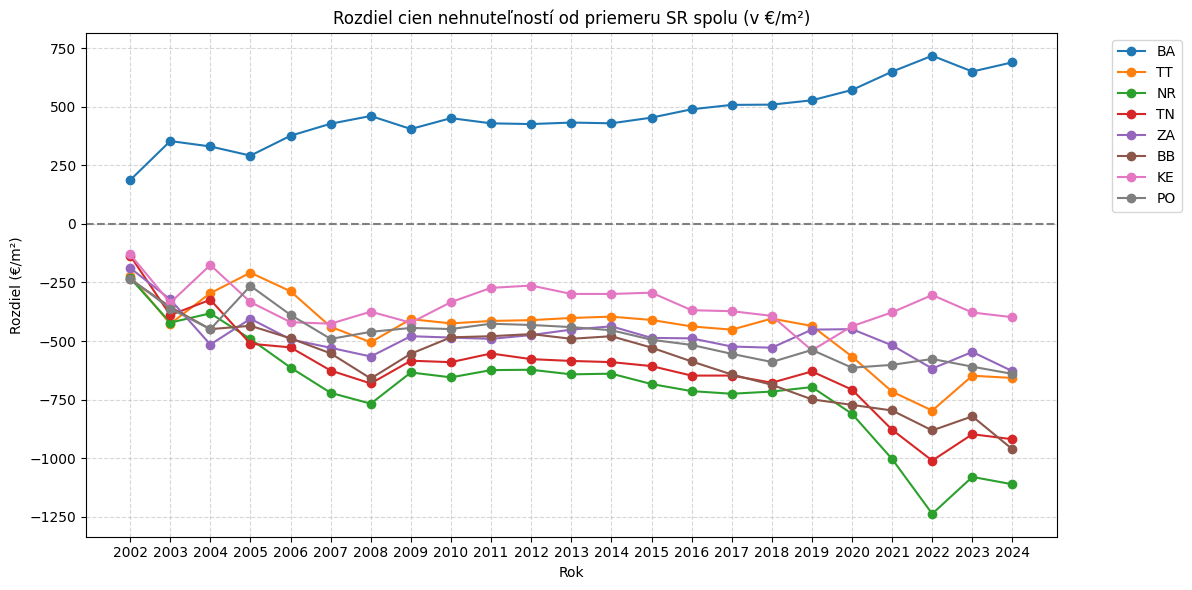

In [ ]:
# rozdiel medzi a krajmi aceloslovenským priemerom za každý rok (stĺpec 'Spolu')
# axis=0 - odcitanie po riadkoch v dataframe
df_diff = df_years[region_cols].subtract(df_years["Spolu"], axis=0)

# pridám stĺpec 'Rok'
df_diff["Rok"] = df_years["Rok"]
# nastavenie stlpca 'Rok' ako indexu
df_diff = df_diff.set_index("Rok")

# zobrazenie dataframe
display(df_diff)

# vizualizácia
plt.figure(figsize=(12, 6))
for col in region_cols:
    plt.plot(df_diff.index, df_diff[col], marker="o", label=col)
    # vysvetlivka:
    # df_diff.index obsahuje roky (2022, 2023, 2024) – na x-ovej osi.
    # df_diff[col] obsahuje rozdiely cien oproti priemeru SR pre daný kraj – na y-ovej osi.
    # marker="o" vykreslí bodky na krivke.
    # label=col nastaví meno kraja pre legendu.

# pridá vodorovnú čiaru na úrovni 0, ktorá vizuálne rozdeľuje krajiny nad priemerom (kladné hodnoty) a pod priemerom (záporné hodnoty).
plt.axhline(0, color="gray", linestyle="--")

# popisy a osy
plt.title("Rozdiel cien nehnuteľností od priemeru SR spolu (v €/m²)")
plt.xlabel("Rok")
plt.ylabel("Rozdiel (€/m²)")

# Nastaví hodnoty na x-ovej osi (roky) tak, aby boli presne tie, ktoré sú v údajoch (napr. 2022, 2023, 2024) a bez desatinných čísel
plt.xticks(df_diff.index.unique())

#  Zobrazí legendu (mená krajov) mimo grafu napravo (posunutú trochu doprava, aby neprekážala grafu)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

# zapne mriežku v pozadí pre lepšiu čitateľnosť hodnôt.
# Použije čiarkované čiary (--) s polopriesvitnosťou (alpha=0.5
plt.grid(True, linestyle="--", alpha=0.5)

# Automaticky upraví rozloženie prvkov v grafe (napr. priestor pre legendu, názvy osí), aby nič nepresahovalo
plt.tight_layout()
plt.show()